# Delhi House Price Prediction

In [66]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [67]:
# Loading the dataset
df = pd.read_csv('MagicBricks.csv')
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [68]:
# Checking the shape of the dataset
df.shape

(1259, 11)

In [69]:
# Checking for null/missing values
df.isnull().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

The dataset has five columns with missing values - Parking, Bathroom, Furnishing, Type and Per_Sqft. Finding value for Per_Sqft is quite easy. We have to divide Price by Area to get Per_Sqft. To find the missing values in Parking, Bathroom, Furnishing and Type, I will replace the missing values with the mode of them.

In [70]:
# Replacing missing value in Per_Sqft
df['Per_Sqft'] = df['Per_Sqft'].fillna(df['Price']/df['Area'])

In [71]:
# Replacing missing values in Parking, Bathroom, Furnishing and Type
df['Parking'].fillna(df['Parking'].mode()[0], inplace=True)
df['Bathroom'].fillna(df['Bathroom'].mode()[0], inplace=True)
df['Furnishing'].fillna(df['Furnishing'].mode()[0], inplace=True)
df['Type'].fillna(df['Type'].mode()[0], inplace=True)

C:\Users\Nihal\AppData\Local\Temp\ipykernel_17736\688991274.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Parking'].fillna(df['Parking'].mode()[0], inplace=True)
C:\Users\Nihal\AppData\Local\Temp\ipykernel_17736\688991274.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [72]:
# Checking for missing values
df.isnull().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     0
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           0
Per_Sqft       0
dtype: int64

Checking datatype of each column

In [73]:
df.dtypes

Area           float64
BHK              int64
Bathroom       float64
Furnishing      object
Locality        object
Parking        float64
Price            int64
Status          object
Transaction     object
Type            object
Per_Sqft       float64
dtype: object

Parking and Number of bathrooms, cam't be in float so, converting them into integer

In [74]:
# Type casting
df[['Parking', 'Bathroom']].astype('int64')

,Parking,Bathroom
0,1,2
1,1,2
2,1,2
3,1,2
4,1,2
...,...,...
1254,3,5
1255,3,2
1256,3,3
1257,1,2


Unique value count in each column

In [75]:
# Unique value count
df.nunique()

Area           315
BHK              8
Bathroom         7
Furnishing       3
Locality       365
Parking          9
Price          284
Status           2
Transaction      2
Type             2
Per_Sqft       433
dtype: int64

Value count for each value in each variable

In [76]:
# Value count for each value
print(df['Area'].value_counts(),'\n', df['BHK'].value_counts(),'\n', df['Bathroom'].value_counts(),'\n', df['Parking'].value_counts(),'\n', df['Furnishing'].value_counts(),'\n', df['Status'].value_counts(),'\n', df['Transaction'].value_counts(),'\n', df['Type'].value_counts(),'\n', df['Per_Sqft'].value_counts())

Area
900.0      67
1500.0     50
1800.0     48
1000.0     42
1600.0     38
           ..
1116.0      1
2625.0      1
125.0       1
4118.0      1
11050.0     1
Name: count, Length: 315, dtype: int64 
 BHK
3     541
2     367
4     220
1      96
5      27
6       6
7       1
10      1
Name: count, dtype: int64 
 Bathroom
2.0    553
3.0    355
1.0    146
4.0    138
5.0     57
6.0      7
7.0      3
Name: count, dtype: int64 
 Parking
1.0      829
2.0      341
3.0       54
4.0       16
5.0        7
39.0       7
114.0      3
9.0        1
10.0       1
Name: count, dtype: int64 
 Furnishing
Semi-Furnished    713
Unfurnished       363
Furnished         183
Name: count, dtype: int64 
 Status
Ready_to_move    1184
Almost_ready       75
Name: count, dtype: int64 
 Transaction
Resale          781
New_Property    478
Name: count, dtype: int64 
 Type
Builder_Floor    666
Apartment        593
Name: count, dtype: int64 
 Per_Sqft
12500.000000    37
3524.000000     28
6667.000000     27
14818.000000    

#### Adding new area column in Sq Yards for better understanding of area

In [77]:
df['Area_Yards'] = df['Area']/9

### Grouping the House Locality

In [78]:
# Unique Localities
df['Locality'].unique()

array(['Rohini Sector 25', 'J R Designers Floors, Rohini Sector 24',
       'Citizen Apartment, Rohini Sector 13', 'Rohini Sector 24',
       'Rohini Sector 24 carpet area 650 sqft status Ready to Move floor 4 out of 4 floors transaction New Property furnishing Semi-Furnished facing East overlooking Garden/Park, Main Road car parking 1 Open bathroom 2 balcony 1 ownership Freehold Newly Constructed Property Newly Constructed Property East Facing Property 2BHK Newly build property for Sale. A House is waiting for a Friendly Family to make it a lovely home.So please come and make his house feel alive once again. read more Contact Agent View Phone No. Share Feedback Garima properties Certified Agent Trusted by Users Genuine Listings Market Knowledge',
       'Delhi Homes, Rohini Sector 24', 'Rohini Sector 21',
       'Rohini Sector 22', 'Rohini Sector 20',
       'Rohini Sector 8 How Auctions work? The borrower has the physical possession of the Property. However the lender (Bank) can lega

Since there are so many localities in the dataset, I have decided to take only top 10 localities and list the remaining localities as 'other' in the dataset. It will help in analysing the locality of the house in a better way.

In [79]:
def grp_local(locality):
    locality = locality.lower() # avoid case sensitive
    if 'rohini' in locality:
        return 'Rohini Sector'
    elif 'dwarka' in locality:
        return 'Dwarka Sector'
    elif 'shahdara' in locality:
        return 'Shahdara'
    elif 'vasant' in locality:
        return 'Vasant Kunj'
    elif 'paschim' in locality:
        return 'Paschim Vihar'
    elif 'alaknanda' in locality:
        return 'Alaknanda'
    elif 'vasundhar' in locality:
        return 'Vasundhara Enclave'
    elif 'punjabi' in locality:
        return 'Punjabi Bagh'
    elif 'kalkaji' in locality:
        return 'Kalkaji'
    elif 'lajpat' in locality:
        return 'Lajpat Nagar'
    else:
        return 'Other'

df['Locality'] = df['Locality'].apply(grp_local)

In [80]:
df['Locality'].value_counts()

Locality
Other                 716
Lajpat Nagar           90
Dwarka Sector          87
Rohini Sector          75
Shahdara               75
Alaknanda              58
Vasant Kunj            35
Kalkaji                32
Punjabi Bagh           31
Paschim Vihar          30
Vasundhara Enclave     30
Name: count, dtype: int64

In [81]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [82]:
# Using Z - score to remove outliers
from scipy import stats
# Z score
z = np.abs(stats.zscore(df[df.dtypes[df.dtypes != 'object'].index]))
# Removing outliers
df = df[(z < 3).all(axis=1)]

Descriptive Statistics

In [83]:
# Checking descriptive satistics of the data
df.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft,Area_Yards
count,1189.000000,1189.000000,1189.000000,1189.000000,1.189000e+03,1189.000000,1189.000000
mean,1296.421567,2.735913,2.483600,1.410429,1.852459e+07,12629.785274,144.046841
std,750.284776,0.859232,0.952107,0.719913,1.772598e+07,8434.085021,83.364975
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1250.000000,3.111111
25%,800.000000,2.000000,2.000000,1.000000,5.510000e+06,6526.000000,88.888889
50%,1150.000000,3.000000,2.000000,1.000000,1.350000e+07,10943.000000,127.777778
75%,1600.000000,3.000000,3.000000,2.000000,2.490000e+07,16584.000000,177.777778
max,5220.000000,5.000000,5.000000,10.000000,9.300000e+07,72000.000000,580.000000


In [84]:
df.head(10)

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft,Area_Yards
0,800.0,3,2.0,Semi-Furnished,Rohini Sector,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,8125.0,88.888889
1,750.0,2,2.0,Semi-Furnished,Rohini Sector,1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0,83.333333
2,950.0,2,2.0,Furnished,Rohini Sector,1.0,15500000,Ready_to_move,Resale,Apartment,6667.0,105.555556
3,600.0,2,2.0,Semi-Furnished,Rohini Sector,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0,66.666667
4,650.0,2,2.0,Semi-Furnished,Rohini Sector,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0,72.222222
5,1300.0,4,3.0,Semi-Furnished,Rohini Sector,1.0,15500000,Ready_to_move,New_Property,Builder_Floor,6667.0,144.444444
6,1350.0,4,3.0,Semi-Furnished,Rohini Sector,1.0,10000000,Ready_to_move,Resale,Builder_Floor,6667.0,150.000000
7,650.0,2,2.0,Semi-Furnished,Rohini Sector,1.0,4000000,Ready_to_move,New_Property,Apartment,6154.0,72.222222
8,985.0,3,3.0,Unfurnished,Rohini Sector,1.0,6800000,Almost_ready,New_Property,Builder_Floor,6154.0,109.444444
9,1300.0,4,4.0,Semi-Furnished,Rohini Sector,1.0,15000000,Ready_to_move,New_Property,Builder_Floor,6154.0,144.444444


## Exploratory Data Analysis



### Area of Houses

Text(0.5, 1.0, 'Area in Yards')

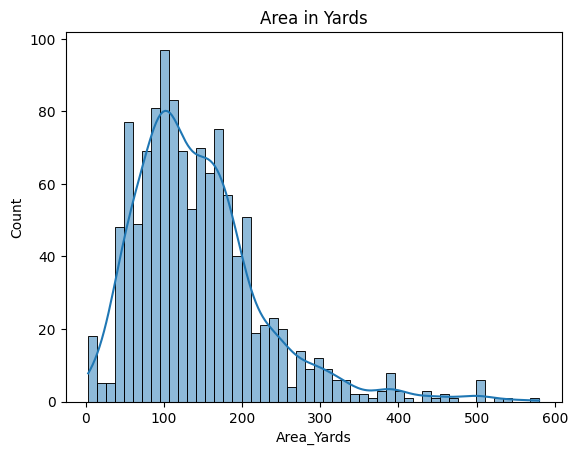

In [85]:
sns.histplot(x = df['Area_Yards'],  kde = True, bins = 50).set_title('Area in Yards')

- Majority of the houses have area between 80-200 sq. yards.
- Houses with area near 200 yards can have a maximum of 3 bedrooms.
- Houses with area near 100 yards can have 2 bedrooms.
- Houses with area less than 80 sq. yards usually have 1 bedroom.
- Houses with area more than 300 sq. yards are fewer in number, which explains the lower count of 4BHK and 5BHK houses.
- There is a relationship between the BHK count and the area of the house, which provides insights into the structure of houses.

### BHK

Text(0.5, 1.0, 'BHK')

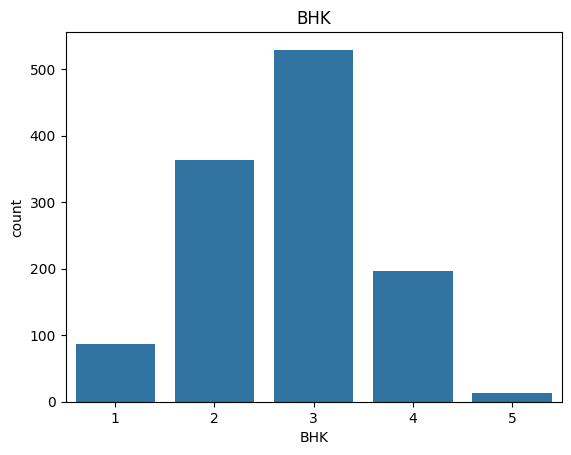

In [86]:
sns.countplot(x = 'BHK', data = df).set_title('BHK')

BHK stands for Bedroom, Hall, and Kitchen.
The graph provides insights into the common house designs in Delhi.
3 BHK houses are the most common, followed by:
2 BHK
4 BHK
1 BHK
5 BHK
The majority of houses have an area between 80 to 200 square yards.
There is a noticeable relationship between house area and number of bedrooms:
Houses around 200 sq. yards typically have up to 3 bedrooms.
Houses around 100 sq. yards generally have 2 bedrooms.
Houses with less than 80 sq. yards usually have 1 bedroom.
Houses with an area above 300 sq. yards are less common, which explains the lower count of 4 BHK and 5 BHK houses.
This correlation helps in understanding the structural pattern of houses in Delhi.

### Bathroom Count

Text(0.5, 1.0, 'Bathroom')

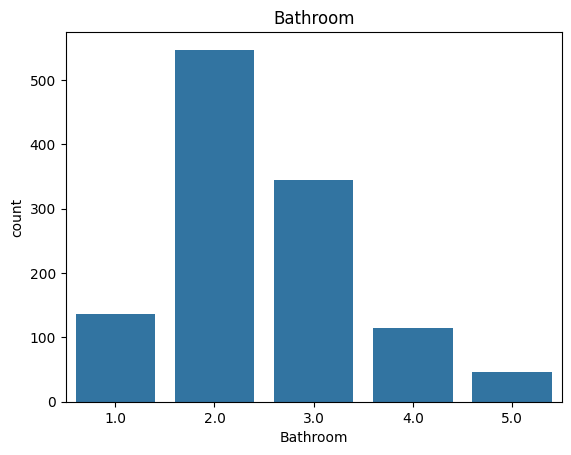

In [87]:
sns.countplot(x = 'Bathroom', data = df).set_title('Bathroom')

Majority of the houses have 2 bathrooms which, is quite obvious. However there some houses having 3 or more than 3 bathrooms, which is means these houses are quite big and spacious to have 3 or more bathrooms. Smaller houses usually have 1 bathroom.

### Furnishing

Text(0.5, 1.0, 'Furnishing')

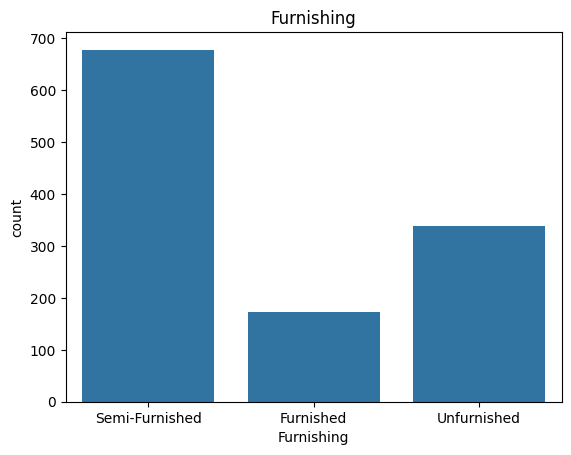

In [88]:
sns.countplot(x='Furnishing',data=df).set_title('Furnishing')

### Locality

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Rohini Sector'),
  Text(1, 0, 'Lajpat Nagar'),
  Text(2, 0, 'Dwarka Sector'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'Vasant Kunj'),
  Text(5, 0, 'Shahdara'),
  Text(6, 0, 'Paschim Vihar'),
  Text(7, 0, 'Alaknanda'),
  Text(8, 0, 'Vasundhara Enclave'),
  Text(9, 0, 'Punjabi Bagh'),
  Text(10, 0, 'Kalkaji')])

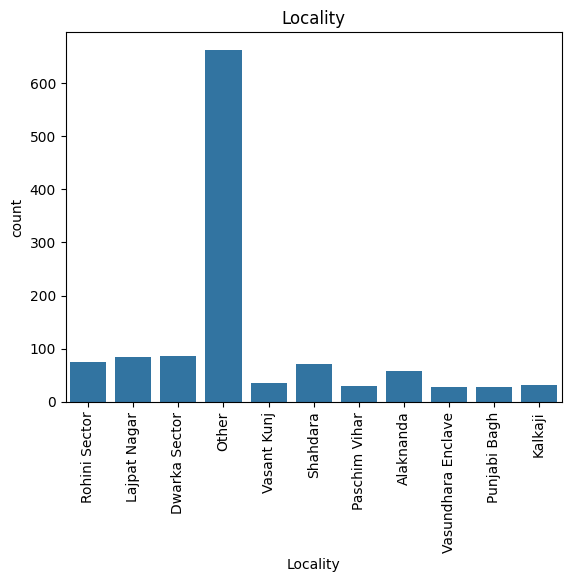

In [89]:
sns.countplot(x = 'Locality', data = df).set_title('Locality')
plt.xticks(rotation = 90)

Since the dataset contains a large number of localities and addresses, I grouped the less frequent ones under a single category called "Others", while highlighting the top ten localities based on the number of houses.
Upon visualizing this data, we can see that:
The "Others" category has the highest count overall (as expected).
Among the named localities, Dwarka Sector has the highest number of houses.
This is followed by Lajpat Nagar and Rohini Sector.
These areas appear to be popular residential choices in Delhi and could be considered good places to settle.
Additionally, Shahdara and Alaknanda also have a significant number of houses, suggesting they are desirable areas as well.

### Parking

Text(0.5, 1.0, 'Parking')

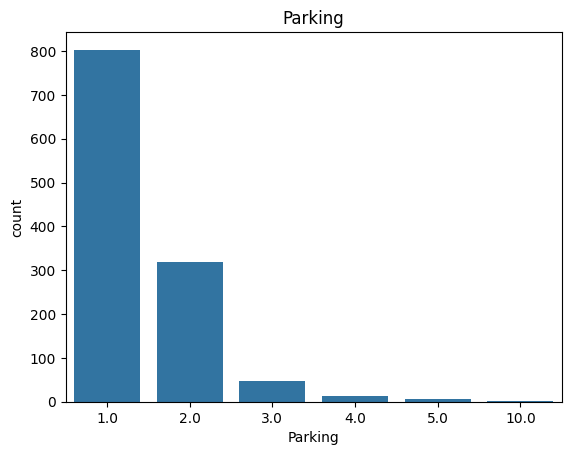

In [90]:
sns.countplot(x = 'Parking', data = df).set_title('Parking')

Majority of the houses in Delhi has one car parking which is quite common. Few of the houses have enough space for two car parking and very few houses have more than two car parking space. We can relate this graph to the graph with house area, where majority of the houses have area between 100 -200 sq. yards. So, it is quite obvious than these house will have one car parking space. The houses with area more than 200 sq. yards will have more than one car parking space.

### Status

Text(0.5, 1.0, 'Status of the Property')

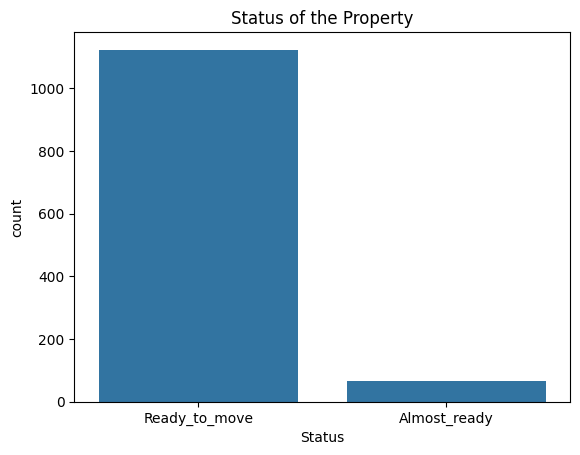

In [91]:
sns.countplot(x = 'Status', data = df).set_title('Status of the Property')

Most of the houses are ready to move and actively looking for buyers. Very few houses are still under construction and would be ready to move soon. 

### Transaction Type

Text(0.5, 1.0, 'Transaction Type')

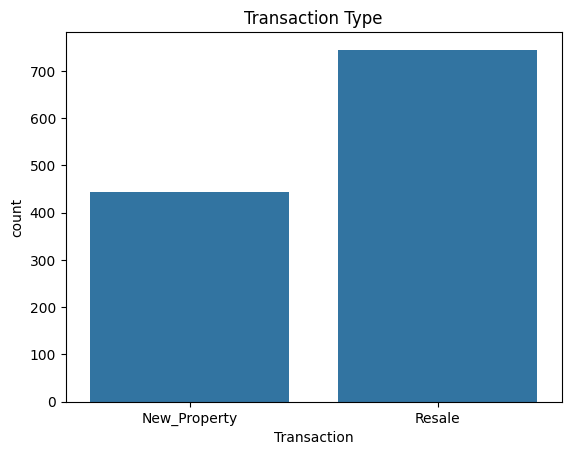

In [92]:
sns.countplot(x='Transaction', data=df).set_title('Transaction Type')

A large number of houses are resale properties, suggesting many people might be moving out of Delhi, possibly due to pollution or other factors. This offers a good opportunity for buyers. Around 430 houses are new properties, likely built for commercial sale.

### House Type

Text(0.5, 1.0, 'Type of House')

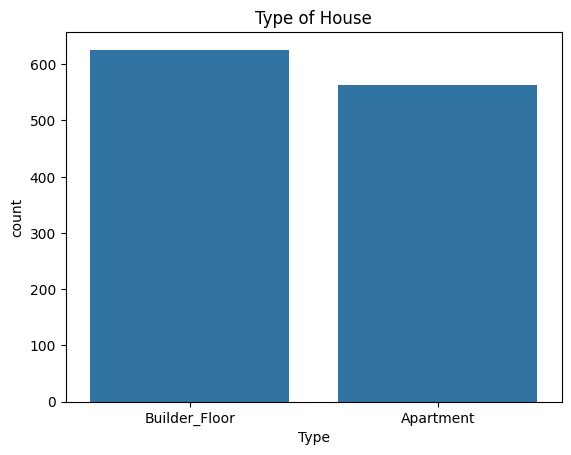

In [93]:
sns.countplot(x='Type',data=df).set_title('Type of House')

Most of the houses are builder floor which means people like to live in independent houses rather than apartments, due to the privacy and space they get in independent houses.

Till now, I have visualize the distribution of data across variables in the dataset. Now, I will be looking at the realtion between the target variable i.e Price and independent variables.

### Area and Price

<Axes: xlabel='Area_Yards', ylabel='Price'>

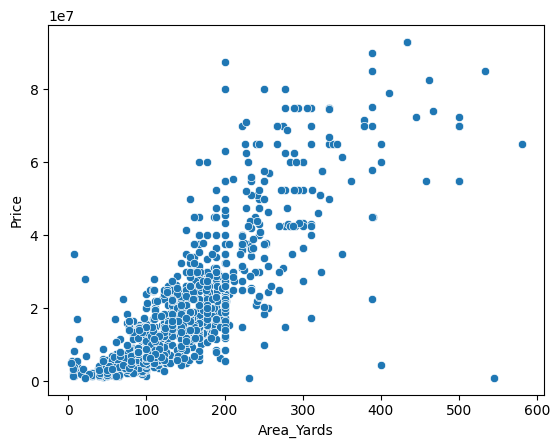

In [94]:
sns.scatterplot(x = 'Area_Yards', y = 'Price', data = df)

The scatterplot graph has trend of increase in price with increase in area, which is obvious. However, there are some houses whose price is lower as compared to other with similar area, which means there are several other factors which affects price of the house.

### BHK and Price

Text(0.5, 1.0, 'BHK vs Price')

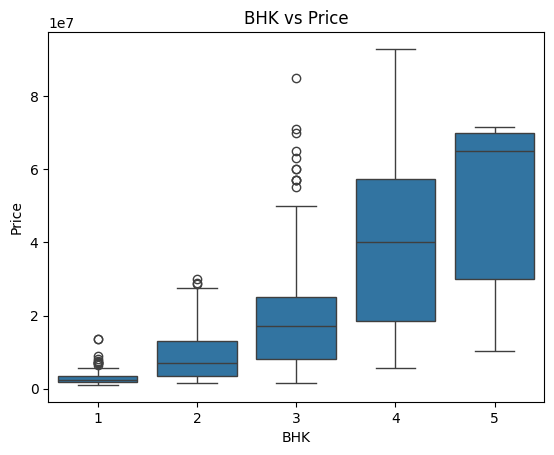

In [95]:
sns.boxplot(x = 'BHK', y = 'Price', data = df).set_title('BHK vs Price')

From this boxplot, we get to know about the relation between the price of the house and the BHK count. We can see that the price of the house increases with the increase in the BHK count, which evident from the fact that 5 BHK houses have the highes median price i.e. nearly 7,00,00,000 INR followed by 4 BHK houses with median price of nearly 4,00,00,000 INR. Incomparison to that, 3BHK houses have median price near about 1 crore INR and 2BHK houses have median price of nearly 50,00,000 INR. The 1BHK houses have the lowest median price of nearly 30,00,000 INR.

### Bathroom count and Price

Text(0.5, 1.0, 'Bathroom vs Price')

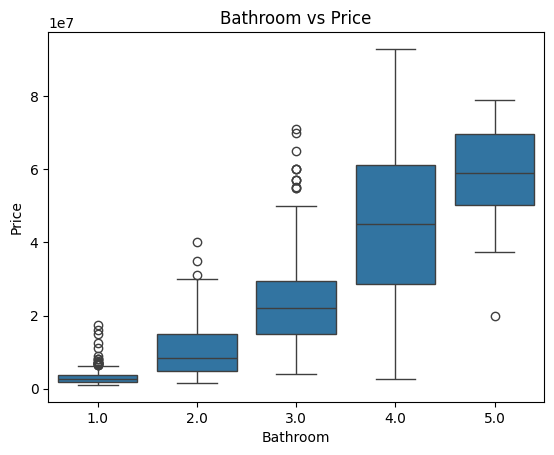

In [96]:
sns.boxplot(x = 'Bathroom', y = 'Price', data = df).set_title('Bathroom vs Price')

The graph is similar to the previous graph for BHK and Price. Here the price of the house increases with increase in the number of bathrooms. Moreover the each bathroom count has similar house price as the previous graph for BHK and Price. Therefore, we can say that number of bathrooms and the BHK of the house are highly correlated.

### Parking and Price

Text(0.5, 1.0, 'Parking vs Price')

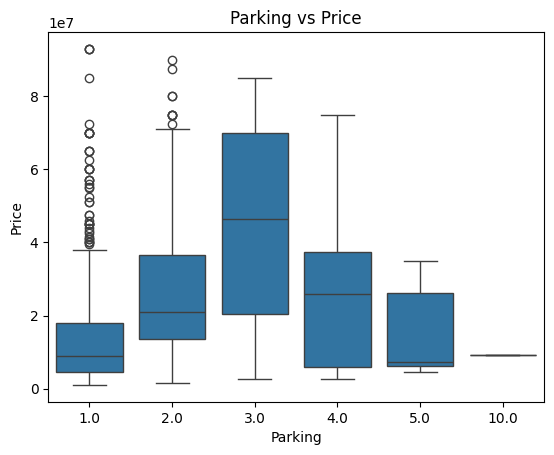

In [97]:
sns.boxplot(x = 'Parking', y = 'Price', data = df).set_title('Parking vs Price')

This boxplot graphs shows the relationship between the parking space and the price of the house. Houses with 3 parking spaces has highest median price which is 4,50,00,000, followed by 3 parking space, 2 parking space and 1 parking space. From this graph, we can assume that people usually look for the houses to have sufficient parking space, which means they don't want more than enough space for parking which evident throught the lower median price of houses with 4 parking space or more.

### Locality and Price

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Rohini Sector'),
  Text(1, 0, 'Lajpat Nagar'),
  Text(2, 0, 'Dwarka Sector'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'Vasant Kunj'),
  Text(5, 0, 'Shahdara'),
  Text(6, 0, 'Paschim Vihar'),
  Text(7, 0, 'Alaknanda'),
  Text(8, 0, 'Vasundhara Enclave'),
  Text(9, 0, 'Punjabi Bagh'),
  Text(10, 0, 'Kalkaji')])

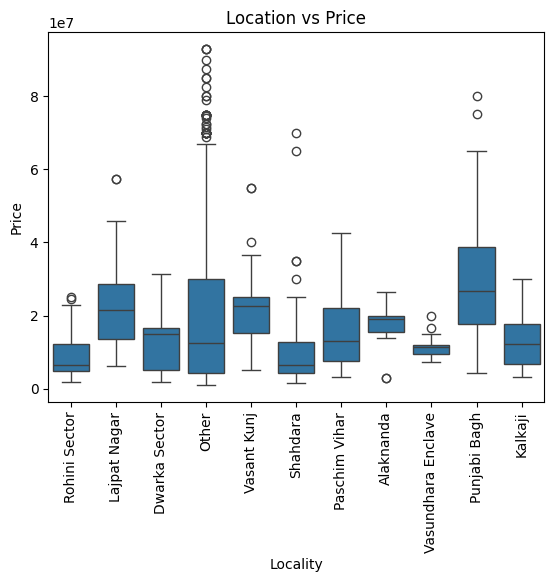

In [98]:
sns.boxplot(x='Locality', y='Price', data=df).set_title('Location vs Price')
plt.xticks(rotation=90)

From this graph, we can get idea about the localities along with the house price. Punjabi Bagh locality has the highest median price of nearly 2,50,00,000 INR, which means this is a posh locality. Punjabi Bagh is followed by Lagpat Nagar and Vasant Kunj. These two localities can be included in the posh locality. The localities with lowest median prices includes - Rohini Sector, Vasundhara Enclave and Shahdara. Some of the mediocre localities are - Dwarka Sector,  Pashchim Vihar, Kalkaji, and the rest of the localities are average.

### Furnishing and Price

Text(0.5, 1.0, 'Furnishing vs Price')

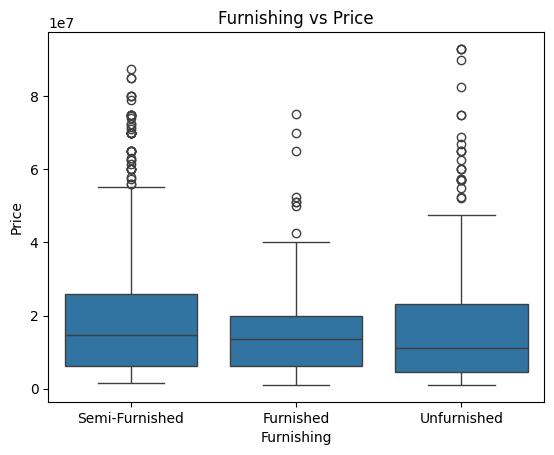

In [99]:
sns.boxplot(x = 'Furnishing', y = 'Price', data = df).set_title('Furnishing vs Price')

There is very little difference in the median house price based on the furnishing status. Interestingly, the furnished houses have a lower median price than the semi-furnished houses. The unfurnished houses have the lowest median price.

### Status and Price

Text(0.5, 1.0, 'Price vs Status')

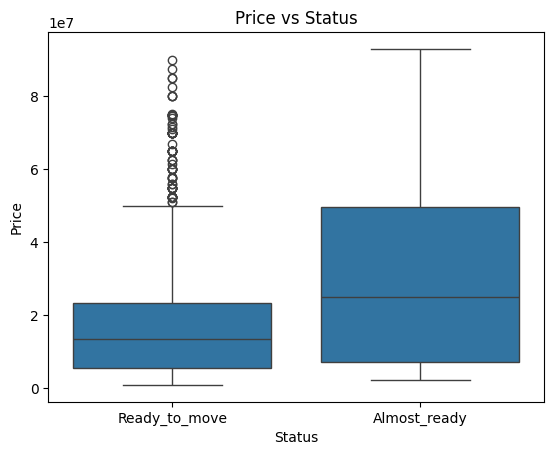

In [100]:
sns.boxplot(x = 'Status', y = 'Price', data = df).set_title('Price vs Status')

Surprisingly the houses that are still under construction have higher median price than those which are ready to move in. This might be because the houses that are still under construction allow the buyers to make changes to interior/exterior. 

### Transaction Type and Price

Text(0.5, 1.0, 'Transaction vs Price')

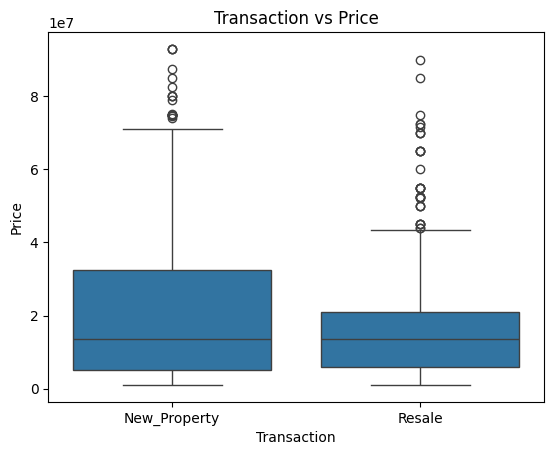

In [101]:
sns.boxplot(x = 'Transaction', y = 'Price', data = df).set_title('Transaction vs Price')

As expected the new properties have higher price than old ones/ resale ones. The new properties attracts more buyers to make features including reliability, designs. Whereas the resale one sometimes poses doubts for the buyers. 

### Property Type and Price

Text(0.5, 1.0, 'Price vs Type')

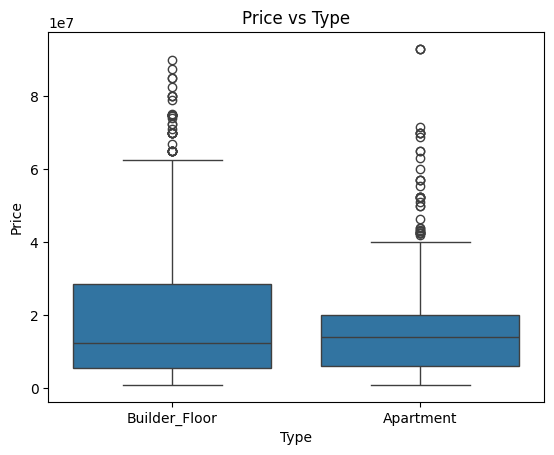

In [102]:
sns.boxplot(x = 'Type', y = 'Price', data = df).set_title('Price vs Type')

Builder Floor and Apartment type houses have a similar median price, with Apartments being slightly more expensive. However, Builder Floors are more common, indicating a higher buyer preference for this type.

## Data Preprocessing 2

#### Label encoding the categorical variables

In [103]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Columns for label encoding
cols = ['Furnishing', 'Locality', 'Status', 'Transaction', 'Type']

for i in cols:
    le.fit(df[i])
    df[i] = le.transform(df[i])
    print(i, df[i].unique())

Furnishing [1 0 2]
Locality [ 7  3  1  4  9  8  5  0 10  6  2]
Status [1 0]
Transaction [0 1]
Type [1 0]


#### Normalizing the continuous features

In [104]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
df[['Area', 'Price', 'Per_Sqft', 'Area_Yards']] = MinMaxScaler().fit_transform(df[['Area', 'Price', 'Per_Sqft', 'Area_Yards']])

In [105]:
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft,Area_Yards
0,0.148690,3,2.0,1,7,1.0,0.059783,1,0,1,0.097173,0.148690
1,0.139060,2,2.0,1,7,1.0,0.043478,1,0,0,0.076565,0.139060
2,0.177581,2,2.0,0,7,1.0,0.157609,1,1,0,0.076565,0.177581
3,0.110169,2,2.0,1,7,1.0,0.034783,1,1,1,0.076565,0.110169
4,0.119800,2,2.0,1,7,1.0,0.056522,1,0,1,0.076565,0.119800


## Coorelation Matrix Heatmap

<Axes: >

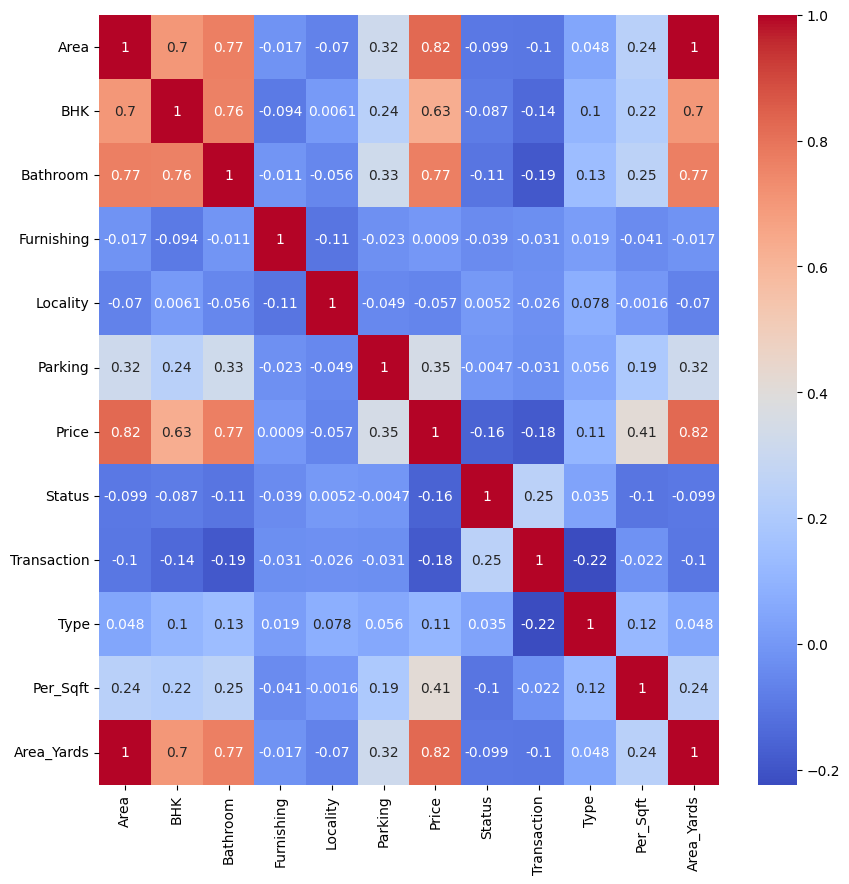

In [106]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In this coorelation matrix heatmap, we can see that the price of the house has high positive coorelation with land area, BHK, bathroom count, which proves are previous obersevation about their relation. 

## Train Test Split

In [107]:
# Dropping Per_Sqft column
df.drop(['Per_Sqft'],axis=1,inplace=True)

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Price',axis=1), df['Price'], test_size=0.2, random_state=42)

## Price Prediction
I will be using the following models:
- Decision Tree Regressor
- Random Forest Regressor

### Decision Tree Regressor

In [109]:
from sklearn.tree import DecisionTreeRegressor

#creating Decision Tree Regressor object
dtr = DecisionTreeRegressor()

#### Hypertuning the model with GridSearchCV

In [110]:
from sklearn.model_selection import GridSearchCV

# Defining parameters
parameters  = {'max_depth':[2,4,6,8],
               'min_samples_split':[2,4,6,8],
               'min_samples_leaf':[1,2,3,4],
               'max_features':['auto','sqrt','log2'],
               'random_state':[0,42]}

# Creating GridSearchCV object
grid_search = GridSearchCV(dtr, parameters, cv=5, scoring='neg_mean_squared_error')

# Fitting data to grid search object
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 8, 'random_state': 42}


c:\Users\Nihal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
640 fits failed out of a total of 1920.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
640 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Nihal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Nihal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\Nihal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\bas

In [126]:
dtr = DecisionTreeRegressor( max_depth=8, max_features='auto', min_samples_leaf = 2, min_samples_split = 8, random_state=42)
dtr

DecisionTreeRegressor(max_depth=8, max_features='auto', min_samples_leaf=2,
                      min_samples_split=8, random_state=42)

In [127]:
# Updating the model with valid max_features parameter
dtr = DecisionTreeRegressor(max_depth=6, max_features='sqrt', min_samples_leaf=1, min_samples_split=8, random_state=42)

# Training the model
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, max_features='sqrt', min_samples_split=8,
                      random_state=42)

In [128]:
# Training Accuracy
dtr.score(X_train, y_train)

0.8193949500855457

In [129]:
# Predicting the house price
d_pred = dtr.predict(X_test)

## Evaluting Decision Tree Regressor Model

In [131]:
dft = pd.DataFrame({'Actual': y_test, 'Predicted': d_pred})
dft.reset_index(drop=True, inplace=True)
dft.head(10)

,Actual,Predicted
0,0.190217,0.172166
1,0.597826,0.557646
2,0.076087,0.120331
3,0.009239,0.022705
4,0.028261,0.022705
5,0.641304,0.218308
6,0.217391,0.274891
7,0.157609,0.218308
8,0.695652,0.172166
9,0.039348,0.071014


<Axes: xlabel='Actual', ylabel='Density'>

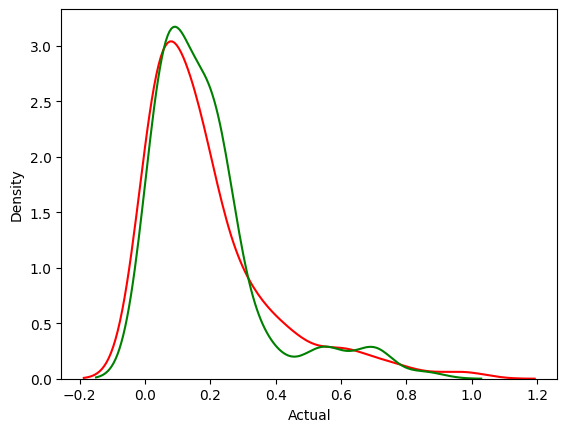

In [132]:
ax = sns.kdeplot(dft['Actual'], color='r', label='Actual Price', fill=False)
sns.kdeplot(dft['Predicted'], color='g', label='Predicted Price', ax=ax, fill=False)

The red shows the distribution count for actual values and the green shows the distribution count for predicted values. The predicted value line tries to follow the actual value line as closely as possible. The closer the two lines are, the better the model is at predicting the house prices.

In [133]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print("R2 Score: ", r2_score(y_test, d_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, d_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, d_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, d_pred)))

R2 Score:  0.763146904316369
Mean Squared Error:  0.00869514881191357
Mean Absolute Error:  0.0608120778284859
Root Mean Squared Error:  0.093247781806934


### Random Forest Regressor

In [134]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regressor Object
rfr = RandomForestRegressor()
rfr

RandomForestRegressor()

In [135]:
# Training the model
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [136]:
# Training Accuracy
rfr.score(X_train, y_train)

0.9628859059802499

In [137]:
# Predicting the house price
r_pred = rfr.predict(X_test)

## Evaluating the Random Forest Regressor Model

In [138]:
dfr = pd.DataFrame({'Actual': y_test, 'Predicted': r_pred})
dfr.reset_index(drop=True, inplace=True)
dfr.head(10)

,Actual,Predicted
0,0.190217,0.151411
1,0.597826,0.499424
2,0.076087,0.079136
3,0.009239,0.029693
4,0.028261,0.016799
5,0.641304,0.598880
6,0.217391,0.333380
7,0.157609,0.185198
8,0.695652,0.295924
9,0.039348,0.040693


<Axes: xlabel='Actual', ylabel='Density'>

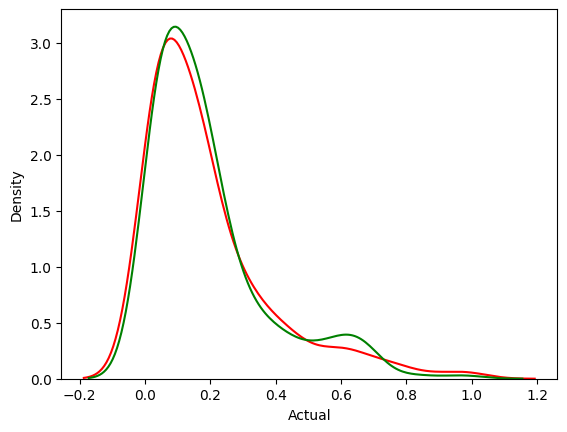

In [139]:
ax = sns.kdeplot(dfr['Actual'], color='r', label='Actual Price', fill=False)
sns.kdeplot(dfr['Predicted'], color='g', label='Predicted Price', ax=ax, fill=False)

The red shows the distribution count for actual values and the green shows the distribution count for predicted values. The predicted value line tries to follow the actual value line as closely as possible. The closer the two lines are, the better the model is at predicting the house prices.

In [140]:
print("R2 Score: ", r2_score(y_test, r_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, r_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, r_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, r_pred)))

R2 Score:  0.8418251537001475
Mean Squared Error:  0.005806780033459471
Mean Absolute Error:  0.046776097205186426
Root Mean Squared Error:  0.07620223115801447


## Conclusion

From the exploratory data analysis, we can conclude that the following features are important for predicting the price of a house in Delhi:

1. **Area**
2. **BHK**
3. **Locality**

From the EDA it was also found that, most of the houses in delhi are small having area between 100 to 200 sq. yards having 2-3 BHK. The price of the houses in localities such as Punjabi Bagh, Lajpat nagar and Vasant Kunj are high as compared to other localities, which means these are posh areas of Delhi. Most of the people prefer a new builder floor property despite the aprtments cost the same because people want to design their house according to their own needs and requirements and want more privacy and independency.

Coming to the machine learning models, I have used regression models - Decision Tree Regressor and Random Forest Regressor. The Random Forest regressor performed better than the Decision Tree Regressor with an accuracy of 84.98%